# <span style="color:red">Étape 2</span>

Vous arrivez à mettre la main sur un fichier de backup labelled_mix.csv retraçant les « Top de l’année » sur plusieurs années pour un compte famille en particulier. Coup de chance, ces données sont labellisées (nom de l’utilisateur Spotify). Vous reconstituerez les playlists « Top de l’année » de chaque utilisateur pour chaque année concernée. Puis, à l’aide de votre modèle, vous prédirez l’appartenance à telle ou telle playlist de chaque titre contenu dans le fichier predict_two.csv 
## <span style="color:teal">Partie 0 - Les librairies </span>

In [1]:
# On vérifie qu'on a bien une distribution Python ≥3.8
import sys
assert sys.version_info >= (3, 8)

# Les classiques
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Pour tracer de jolis graphes
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns
from pandas.plotting import scatter_matrix

# On vérifie qu'on a bien une distribution Scikit-Learn ≥0.20
import sklearn
assert sklearn.__version__ >= "0.20"

# données
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# algorithmes
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

# metriques
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

# encodage
from sklearn.preprocessing import LabelEncoder

## <span style="color:teal">Partie 1 - Les données </span>


In [2]:
# On charge le dataset dans un DataFrame
df = pd.read_csv('labelled_mix.csv').dropna()
df = df.reset_index(drop=True)
df

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,...,speechiness,tempo,valence,time_signature,key,mode,uri,release_year,top_year,user
0,Concierto De Aranjuez,Concierto (CTI Records 40th Anniversary Edition),Jim Hall,1975,1160400,38,0.92800,0.516,0.165,0.878000,...,0.0354,130.431,0.2280,4,2,0,spotify:track:0QVvZNHwBOPAGXgUfkfL5P,1975,2018,delta
1,Formidable,Formidable,La Bronze,2016-04-14,206632,32,0.43600,0.576,0.402,0.000067,...,0.0441,139.792,0.0684,4,7,0,spotify:track:6b6EZlsyiCpCBWj2ZCOnmX,2016,2018,delta
2,La Grande classe,Le Code De L'horreur,Rohff,2008-12-12,275893,42,0.07590,0.706,0.961,0.000000,...,0.1730,86.509,0.5120,4,10,0,spotify:track:7apoo5ErcVtXaLdOkGdh1q,2008,2016,epsilon
3,Jailhouse Rock,TPH Production Perform The Blues Brothers,The Blues Brothers,2005-08-08,206393,0,0.22700,0.594,0.759,0.000570,...,0.0514,89.995,0.9440,4,9,0,spotify:track:1fnGQ8O5hrmg14QGnPzLR2,2005,2016,epsilon
4,Human,Human (Deluxe),Rag'n'Bone Man,2017-02-10,200186,82,0.39300,0.602,0.707,0.000000,...,0.3020,75.087,0.5540,4,9,1,spotify:track:58zsLZPvfflaiIbNWoA22O,2017,2017,beta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785,Angela,Chaise pliante,Hatik,2019-08-30,236000,61,0.70200,0.650,0.469,0.249000,...,0.1840,191.853,0.3780,4,2,0,spotify:track:6ab3CQvDlAVttThZucwGQ1,2019,2020,gamma
3786,Sunday With A Flu,Tree Of Life,Yodelice,2009-01-01,137093,60,0.17500,0.632,0.672,0.000073,...,0.0406,174.162,0.9270,4,2,0,spotify:track:05pU63DL8dSAApA8amj0ql,2009,2021,alpha
3787,J'suis pas dans le Game,L'Apogée,Sexion d'Assaut,2012-11-19,261853,36,0.11100,0.854,0.631,0.000000,...,0.1150,76.014,0.3580,4,6,1,spotify:track:5rftQabJ357Yn3WAEts6T0,2012,2022,gamma
3788,Cyber Party,Distant Reality,Shirobon,2014-02-04,166779,0,0.00238,0.722,0.895,0.734000,...,0.0353,117.974,0.4420,4,1,1,spotify:track:5wszrErn3CKFkARtskv5V2,2014,2021,epsilon


In [3]:
# On charge le dataset dans un DataFrame
df_predict = pd.read_csv('predict_two.csv', sep=';').dropna()
df_predict = df_predict.reset_index(drop=True)
df_predict

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,...,loudness,speechiness,tempo,valence,time_signature,key,mode,uri,release_year,top_year
0,Autumn Leaves,Summerwind,Lars Danielsson,28/09/2018,237984,36,0.974,0.370,0.0548,0.112000,...,-18.349,0.0385,65.250,0.3760,4,7,0,spotify:track:5rXJ6iWGWLEOBHGtdBvDlV,2018,2023
1,Blues sur Seine,Mare Nostrum III,Paolo Fresu,25/01/2019,293609,33,0.988,0.336,0.0275,0.648000,...,-18.082,0.0422,76.567,0.2660,3,9,0,spotify:track:2mEsVtCXgm4NbnIiRC3sdK,2019,2023
2,Le jardin des F√©es,Mare Nostrum III,Paolo Fresu,25/01/2019,312062,27,0.989,0.273,0.1390,0.926000,...,-15.384,0.0368,132.169,0.1030,3,9,0,spotify:track:3mvDItSAf5SeniJ1hdJf8w,2019,2023
3,El Ciego,P60LO FR3SU,Paolo Fresu,10/02/2021,341391,3,0.956,0.579,0.2940,0.494000,...,-11.119,0.0700,105.913,0.4850,4,2,0,spotify:track:5Mfrusx5JOup56lSbJl5gq,2021,2023
4,Jenny Wren,Chimichurri,Baptiste Trotignon,23/09/2016,234986,32,0.851,0.421,0.2020,0.948000,...,-19.460,0.0399,97.266,0.3240,4,5,0,spotify:track:1Kf83SdGMMFnoPj6oQbLN3,2016,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sang M√™l√©,Face to Face,Eddy Louiss,06/11/2001,305840,7,0.871,0.619,0.4620,0.567000,...,-9.694,0.0532,108.602,0.6480,3,5,0,spotify:track:5x2JOUmS1Xcn2du5LziV5E,2001,2023
96,Maryan,Shleep,Robert Wyatt,1997,371093,26,0.798,0.479,0.3220,0.374000,...,-14.819,0.0295,115.140,0.0943,1,2,1,spotify:track:4epAz872eTEixF8kEnTTS2,1997,2023
97,Moon Over Bourbon Street,The Dream Of The Blue Turtles,Sting,01/01/1985,240306,50,0.670,0.413,0.0563,0.000126,...,-22.264,0.0410,124.977,0.1830,4,5,0,spotify:track:3KF1EXX2zGfVtGeZKiClB0,1985,2023
98,No Woman No Cry,Harlem-Kingston Express (Live at Dizzy's Club ...,Monty Alexander,14/06/2011,426053,31,0.683,0.536,0.4340,0.926000,...,-15.181,0.0353,87.011,0.3650,4,0,1,spotify:track:5RdShEqRmAFgiCwplAWS81,2011,2023


### Coup d'œil rapide à la structure des données

Jetons un oeil aux données de notre DataFrame

In [ ]:
df.describe(include='all')

Nous nous sommes rendus compte que les accuracy_score max que l'on arrivait à obtenir avec les données brutes (avec quelques légers ajustements) n'étaient pas satisfaisants.

Or, on peut deviner qu'un grand nombre d'information se trouve dans les colonnes 'artist' et 'album' puisqu'un utilisateur aura plus tendance à écouter un son d'un artiste qu'il apprécie ou un son du même album.

On a donc décidé de créer des dummies pour ces 2 colonnes, ce qui nous rajoute pas mal de colonnes au final et donc allonge les calculs, mais nous donne des scores plus satisfaisants.

In [4]:
# Créer une liste de tous les artistes et albums uniques dans les deux ensembles
all_artists = set(df['artist'].unique()).union(set(df_predict['artist'].unique()))
all_albums = set(df['album'].unique()).union(set(df_predict['album'].unique()))

# Créer des colonnes dummy pour chaque artiste et album dans les deux ensembles
df_artist_dummies = pd.get_dummies(df['artist']).reindex(columns=all_artists, fill_value=0)
df_album_dummies = pd.get_dummies(df['album']).reindex(columns=all_albums, fill_value=0)

df_predict_artist_dummies = pd.get_dummies(df_predict['artist']).reindex(columns=all_artists, fill_value=0)
df_predict_album_dummies = pd.get_dummies(df_predict['album']).reindex(columns=all_albums, fill_value=0)

# Ajouter ces colonnes dummy aux ensembles de données originaux
df1 = pd.concat([df, df_artist_dummies, df_album_dummies], axis=1)
df_predict1 = pd.concat([df_predict, df_predict_artist_dummies, df_predict_album_dummies], axis=1)

# Supprimer les colonnes 'artist' et 'album' originales si nécessaire
df1.drop(['artist', 'album'], axis=1, inplace=True)
df_predict1.drop(['artist', 'album'], axis=1, inplace=True)


In [5]:
# On drop les colonnes qui ne nous intéressent pas pour la classification
df1 = df1.drop(columns=['uri','name','release_date', 'top_year'])
df1

,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,Take Me To The Alley,Things I Said,Chimichurri,Is There Anybody Out There?,BOOM,The Conversation,Beyond Love (feat. Lara Ausensi),SEX AND LOVE (Deluxe),Loving Vincent (Original Motion Picture Soundtrack),Coming From Reality
0,1160400,38,0.92800,0.516,0.165,0.878000,0.1090,-22.397,0.0354,130.431,...,False,False,0,False,False,False,False,False,False,False
1,206632,32,0.43600,0.576,0.402,0.000067,0.1010,-8.595,0.0441,139.792,...,False,False,0,False,False,False,False,False,False,False
2,275893,42,0.07590,0.706,0.961,0.000000,0.3340,-2.723,0.1730,86.509,...,False,False,0,False,False,False,False,False,False,False
3,206393,0,0.22700,0.594,0.759,0.000570,0.2930,-9.884,0.0514,89.995,...,False,False,0,False,False,False,False,False,False,False
4,200186,82,0.39300,0.602,0.707,0.000000,0.1650,-4.097,0.3020,75.087,...,False,False,0,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785,236000,61,0.70200,0.650,0.469,0.249000,0.1060,-8.676,0.1840,191.853,...,False,False,0,False,False,False,False,False,False,False
3786,137093,60,0.17500,0.632,0.672,0.000073,0.1250,-6.963,0.0406,174.162,...,False,False,0,False,False,False,False,False,False,False
3787,261853,36,0.11100,0.854,0.631,0.000000,0.0972,-5.184,0.1150,76.014,...,False,False,0,False,False,False,False,False,False,False
3788,166779,0,0.00238,0.722,0.895,0.734000,0.0899,-6.533,0.0353,117.974,...,False,False,0,False,False,False,False,False,False,False


In [6]:
df_predict1 = df_predict1.drop(columns=['uri','name','release_date',' top_year'])
df_predict1

,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,Take Me To The Alley,Things I Said,Chimichurri,Is There Anybody Out There?,BOOM,The Conversation,Beyond Love (feat. Lara Ausensi),SEX AND LOVE (Deluxe),Loving Vincent (Original Motion Picture Soundtrack),Coming From Reality
0,237984,36,0.974,0.370,0.0548,0.112000,0.0952,-18.349,0.0385,65.250,...,0,0,False,0,0,0,0,0,0,0
1,293609,33,0.988,0.336,0.0275,0.648000,0.1940,-18.082,0.0422,76.567,...,0,0,False,0,0,0,0,0,0,0
2,312062,27,0.989,0.273,0.1390,0.926000,0.1190,-15.384,0.0368,132.169,...,0,0,False,0,0,0,0,0,0,0
3,341391,3,0.956,0.579,0.2940,0.494000,0.2080,-11.119,0.0700,105.913,...,0,0,False,0,0,0,0,0,0,0
4,234986,32,0.851,0.421,0.2020,0.948000,0.0977,-19.460,0.0399,97.266,...,0,0,True,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,305840,7,0.871,0.619,0.4620,0.567000,0.1090,-9.694,0.0532,108.602,...,0,0,False,0,0,0,0,0,0,0
96,371093,26,0.798,0.479,0.3220,0.374000,0.3310,-14.819,0.0295,115.140,...,0,0,False,0,0,0,0,0,0,0
97,240306,50,0.670,0.413,0.0563,0.000126,0.1020,-22.264,0.0410,124.977,...,0,0,False,0,0,0,0,0,0,0
98,426053,31,0.683,0.536,0.4340,0.926000,0.7870,-15.181,0.0353,87.011,...,0,0,False,0,0,0,0,0,0,0


On s'est rendu compte que la fonction .corr ne prenait que des données numériques.

Il nous faut donc convertir la colonne 'user' qui est la cible de notre classification en données numériques.

On va convertir cette colonne à l'aide d'un encodage LabelEncoder.

In [7]:
# Encodage LabelEncoder()
# Extraction de la colonne user
user_data = df1['user']

# Instanciation de LabelEncoder et application sur la colonne user
label_encoder = LabelEncoder()
encoded_user_data = label_encoder.fit_transform(user_data)

# Remplacement de la colonne user par les valeurs encodées dans la DataFrame
df1['user'] = encoded_user_data
df1

,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,Take Me To The Alley,Things I Said,Chimichurri,Is There Anybody Out There?,BOOM,The Conversation,Beyond Love (feat. Lara Ausensi),SEX AND LOVE (Deluxe),Loving Vincent (Original Motion Picture Soundtrack),Coming From Reality
0,1160400,38,0.92800,0.516,0.165,0.878000,0.1090,-22.397,0.0354,130.431,...,False,False,0,False,False,False,False,False,False,False
1,206632,32,0.43600,0.576,0.402,0.000067,0.1010,-8.595,0.0441,139.792,...,False,False,0,False,False,False,False,False,False,False
2,275893,42,0.07590,0.706,0.961,0.000000,0.3340,-2.723,0.1730,86.509,...,False,False,0,False,False,False,False,False,False,False
3,206393,0,0.22700,0.594,0.759,0.000570,0.2930,-9.884,0.0514,89.995,...,False,False,0,False,False,False,False,False,False,False
4,200186,82,0.39300,0.602,0.707,0.000000,0.1650,-4.097,0.3020,75.087,...,False,False,0,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785,236000,61,0.70200,0.650,0.469,0.249000,0.1060,-8.676,0.1840,191.853,...,False,False,0,False,False,False,False,False,False,False
3786,137093,60,0.17500,0.632,0.672,0.000073,0.1250,-6.963,0.0406,174.162,...,False,False,0,False,False,False,False,False,False,False
3787,261853,36,0.11100,0.854,0.631,0.000000,0.0972,-5.184,0.1150,76.014,...,False,False,0,False,False,False,False,False,False,False
3788,166779,0,0.00238,0.722,0.895,0.734000,0.0899,-6.533,0.0353,117.974,...,False,False,0,False,False,False,False,False,False,False


In [ ]:
# On préfèrera créer la matrice sur la df sans les dummies pour la rapidité et la lisibilité
df1_corr = df1.corr()

In [ ]:
# Identification des corrélations
df1_corr.style.background_gradient(cmap='coolwarm', axis=None)

In [8]:
#Utilisée à la toute fin pour l'analyse des styles de musiques par utilisateur

df_num = df.drop(columns=['uri','name','release_date', 'top_year','album','artist'])
# Encodage LabelEncoder()
# Extraction de la colonne user
user_data1 = df_num['user']

# Instanciation de LabelEncoder et application sur la colonne user
label_encoder1 = LabelEncoder()
encoded_user_data1 = label_encoder.fit_transform(user_data1)

# Remplacement de la colonne user par les valeurs encodées dans la DataFrame
df_num['user'] = encoded_user_data1
df_num

,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature,key,mode,release_year,user
0,1160400,38,0.92800,0.516,0.165,0.878000,0.1090,-22.397,0.0354,130.431,0.2280,4,2,0,1975,2
1,206632,32,0.43600,0.576,0.402,0.000067,0.1010,-8.595,0.0441,139.792,0.0684,4,7,0,2016,2
2,275893,42,0.07590,0.706,0.961,0.000000,0.3340,-2.723,0.1730,86.509,0.5120,4,10,0,2008,4
3,206393,0,0.22700,0.594,0.759,0.000570,0.2930,-9.884,0.0514,89.995,0.9440,4,9,0,2005,4
4,200186,82,0.39300,0.602,0.707,0.000000,0.1650,-4.097,0.3020,75.087,0.5540,4,9,1,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785,236000,61,0.70200,0.650,0.469,0.249000,0.1060,-8.676,0.1840,191.853,0.3780,4,2,0,2019,5
3786,137093,60,0.17500,0.632,0.672,0.000073,0.1250,-6.963,0.0406,174.162,0.9270,4,2,0,2009,0
3787,261853,36,0.11100,0.854,0.631,0.000000,0.0972,-5.184,0.1150,76.014,0.3580,4,6,1,2012,5
3788,166779,0,0.00238,0.722,0.895,0.734000,0.0899,-6.533,0.0353,117.974,0.4420,4,1,1,2014,4


## <span style="color:teal"> Partie 2 - Reconstitution des playlists</span>

In [153]:
# Fonction pour créer les playlists top de l'année pour chaque utilisateur
def creer_playlists(df):
    playlists = {}
    for year in df['top_year'].unique():
        df_year = df[df['top_year'] == year] # On regroupe les données par top_year
        for user in df_year['user'].unique():
            df_user = df_year[df_year['user'] == user] # On sélectionne les utilisateurs qui ont une musique dans le top de l'année concernée par la boucle
            top_songs = df_user.sort_values(by='popularity', ascending=False) #On les trie par popularité
            playlists[(user, year)] = top_songs[['name', 'artist']]
    return playlists

# Création des playlists
playlists_top = creer_playlists(df)

# Affichage d'un exemple de playlist
print(playlists_top[('delta',2018)])  


                                  name             artist
1017          Non, je ne regrette rien         Édith Piaf
1208       Dance Me to the End of Love      Leonard Cohen
1956                You Want It Darker      Leonard Cohen
1848                               Kid     Eddy de Pretto
2599             Long Live the (D)Evil           Moriarty
...                                ...                ...
2496                           Je Pars          Gaël Faye
2555  Hated Because of Great Qualities     Blonde Redhead
2581                           Decency          Balthazar
287               Stranger in Paradise          Classique
362                     Rain And Tears  Aphrodite's Child

[100 rows x 2 columns]


In [154]:
# Fonction pour afficher joliment les playlists
def afficher_playlists(playlists_top):
    for (user, year), playlist in playlists_top.items():
        print(f"Top de l'année {year} pour l'utilisateur {user}:\n")
        print(playlist.to_string(index=False))
        print("\n" + "-"*50 + "\n")

afficher_playlists(playlists_top)


Top de l'année 2018 pour l'utilisateur delta:

                                                                         name                   artist
                                                     Non, je ne regrette rien               Édith Piaf
                                                  Dance Me to the End of Love            Leonard Cohen
                                                           You Want It Darker            Leonard Cohen
                                                                          Kid           Eddy de Pretto
                                                        Long Live the (D)Evil                 Moriarty
                                                          Cumbia Sobre el Mar                  Quantic
                                                                 Fête de trop           Eddy de Pretto
                                                            So Long, Marianne            Leonard Cohen
                          

In [161]:
# On vérifie que cela fait bien ce que l'on souhaite avec cet exemple
df[(df['top_year'] == 2020) & (df['user'] == 'delta')]


,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,...,speechiness,tempo,valence,time_signature,key,mode,uri,release_year,top_year,user
16,Inner City Blues,Cold Fact,Rodríguez,1970-03-05,206680,52,0.193,0.556,0.5420,0.000003,...,0.0450,119.222,0.4240,4,6,1,spotify:track:1pU1pXG43llTiLi1JXl57c,1970,2020,delta
52,Underwater Secrets,Harry Potter And The Goblet Of Fire (Original ...,Various Artists,2005-11-09,146493,44,0.939,0.278,0.0341,0.137000,...,0.0420,79.230,0.0388,3,7,1,spotify:track:4yJvsJ4ZNMfo2wQRo7fm4G,2005,2020,delta
93,Lonely Carousel,Mundo - The Best of Rodrigo Leão,Rodrigo Leão,2000,213906,25,0.402,0.558,0.3930,0.000002,...,0.0462,102.122,0.3420,4,7,0,spotify:track:6xOdWav8E9xzEcVp70KDuM,2000,2020,delta
113,anxiété,les failles,Pomme,2019-11-01,230826,54,0.934,0.562,0.4130,0.262000,...,0.0292,122.127,0.2110,4,9,0,spotify:track:1HYiZbH7QTKfOUe9AmvbJr,2019,2020,delta
151,What He Wrote,I Speak Because I Can,Laura Marling,2010-01-01,247123,59,0.948,0.458,0.0987,0.009540,...,0.0376,139.987,0.3490,3,9,0,spotify:track:2CTOa3CEBts3p1NyTVLTXU,2010,2020,delta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3605,Dumbledore's Army,Harry Potter And The Order Of The Phoenix (Ori...,Various Artists,2007-07-07,160253,57,0.793,0.337,0.1190,0.794000,...,0.0382,80.265,0.2090,4,7,1,spotify:track:2GY8VKvfP3ZtKSk1byDYb1,2007,2020,delta
3612,God Is Alive Magic Is Afoot,Illuminations,Buffy Sainte-Marie,1969,291533,43,0.851,0.350,0.2470,0.000000,...,0.2060,76.806,0.3730,3,0,1,spotify:track:4K3glAui6GSMQfYWxC0qy9,1969,2020,delta
3614,La lavande,À peu près,Pomme,2017-10-06,259386,38,0.749,0.363,0.4000,0.000005,...,0.0301,109.832,0.1210,4,9,1,spotify:track:6XLPl3qFlHQK4t8iUvkxmo,2017,2020,delta
3617,pourquoi la mort te fait peur,les failles cachées,Pomme,2020-02-13,216040,28,0.859,0.271,0.3130,0.660000,...,0.0316,183.752,0.1850,4,1,1,spotify:track:68driiQ4a3Q2d6QnpLpV7g,2020,2020,delta


In [166]:
# Playlist pour l'utilisateur 'delta' en 2018
playlist = playlists_top[('delta', 2018)]

# Afficher les 5 premières et les 5 dernières lignes
print("Playlist pour l'utilisateur 'delta' en 2018 (aperçu) :\n")
print("5 Premières : ")
print(playlist.head(5).to_string(index=False))  # Afficher les 5 premières lignes
print("\n...")
print("5 Dernières : ")
print(playlist.tail(5).to_string(index=False))  # Afficher les 5 dernières lignes

# Afficher des statistiques clés
print("\nStatistiques de la playlist :")
print(f"Nombre total de titres : {len(playlist)}")
print(f"Artistes les plus fréquents : {playlist['artist'].value_counts().head(3).to_string()}")  # Top 3 artistes


Playlist pour l'utilisateur 'delta' en 2018 (aperçu) :

5 Premières : 
                       name         artist
   Non, je ne regrette rien     Édith Piaf
Dance Me to the End of Love  Leonard Cohen
         You Want It Darker  Leonard Cohen
                        Kid Eddy de Pretto
      Long Live the (D)Evil       Moriarty

...
5 Dernières : 
                            name            artist
                         Je Pars         Gaël Faye
Hated Because of Great Qualities    Blonde Redhead
                         Decency         Balthazar
            Stranger in Paradise         Classique
                  Rain And Tears Aphrodite's Child

Statistiques de la playlist :
Nombre total de titres : 100
Artistes les plus fréquents : artist
Gaël Faye        10
Dooz Kawa         6
Leonard Cohen     6


On souhaite maintenant compter le nombre de titre de chaque top pour chaque utilisateur par année

In [159]:
# Initialisation d'un dictionnaire pour stocker les comptes
nombre_de_titres = {}

# Parcours du dictionnaire playlists_top
for key, playlist in playlists_top.items():
    # Compter le nombre de titres dans chaque playlist
    count = len(playlist)
    # Stocker le résultat dans le dictionnaire nombre_de_titres
    nombre_de_titres[key] = count

# Afficher le résultat
for key, count in nombre_de_titres.items():
    user, year = key
    print(f"Utilisateur: {user}, Année: {year}, Nombre de titres: {count}")


Utilisateur: delta, Année: 2018, Nombre de titres: 100
Utilisateur: alpha, Année: 2018, Nombre de titres: 100
Utilisateur: epsilon, Année: 2018, Nombre de titres: 95
Utilisateur: beta, Année: 2018, Nombre de titres: 100
Utilisateur: gamma, Année: 2018, Nombre de titres: 100
Utilisateur: epsilon, Année: 2016, Nombre de titres: 100
Utilisateur: beta, Année: 2016, Nombre de titres: 100
Utilisateur: gamma, Année: 2016, Nombre de titres: 100
Utilisateur: delta, Année: 2016, Nombre de titres: 100
Utilisateur: alpha, Année: 2016, Nombre de titres: 100
Utilisateur: beta, Année: 2017, Nombre de titres: 100
Utilisateur: epsilon, Année: 2017, Nombre de titres: 100
Utilisateur: gamma, Année: 2017, Nombre de titres: 100
Utilisateur: alpha, Année: 2017, Nombre de titres: 100
Utilisateur: delta, Année: 2017, Nombre de titres: 100
Utilisateur: alpha, Année: 2019, Nombre de titres: 100
Utilisateur: gamma, Année: 2019, Nombre de titres: 100
Utilisateur: beta, Année: 2019, Nombre de titres: 100
Utilisate

## <span style="color:teal"> Partie 3 - Préparation des données</span>

### Préparation du jeu de données

Séparons la cible des features (i.e. identifions la variable dépendante y et l'ensemble des variables indépendantes X)

In [9]:
# On retire de la liste des features X la colonne 'user' qui représentent la cible
X = df1.drop(['user'], axis = 1)

# On définit la cible y comme étant la colonne 'user'
y = df1['user']

### Découpage des jeux de données

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

On regarde la taille de chacun des jeux obtenus pour vérifier qu'il n'y a pas eu de pertes de lignes

In [11]:
len(X_train)+len(X_test)

3790

RAS

### Normalisation des données

In [12]:
scaler=StandardScaler()

X_train_scl=scaler.fit_transform(X_train)
X_test_scl=scaler.transform(X_test)

df_predict1_scl = scaler.fit_transform(df_predict1)

## <span style="color:teal"> Partie 4 - Entrainement des modèles et choix</span>

Nous allons pouvoir entraîner des algorithmes de classification pour obtenir des modèles de prédiction des utilisateurs en fonction des features.

Attention! Ici les GridSearch ont une complexité temporelle relativement très élevée (pouvant aller jusqu'à plusieurs dizaines de minutes) du au fait d'avoir ajouté les dummies dans les données de base

Autre précision: Certains paramètres semblent à première vue avoir été reglé avec une assez petite range. En fait, ceux-ci ont été affinés après plusieurs tentatives en réduisant les ranges des valeurs des hyperparamètres

### Régression logistique

In [13]:
parameters = {
    'C': [0.1,1,10,100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear','newton-cg','lbfgs']
}
log_reg_clf = LogisticRegression()
grid_search=GridSearchCV(log_reg_clf,parameters,cv=5,n_jobs=-1)
grid_search.fit(X_train_scl,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs']})

In [14]:
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_
print("Meilleurs paramètres:", best_parameters)
print("Meilleur score:", best_score)


Meilleurs paramètres: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Meilleur score: 0.7368190690568233


In [104]:
# Entraînement du classificateur sur le jeu d'entraînement normalisé
# La cible n'a pas eu besoin d'être normalisée (variable discrète)
log_reg_clf = LogisticRegression(C=0.5,penalty='l1',solver='liblinear')
log_reg_clf.fit(X_train_scl, y_train)

LogisticRegression(C=0.5, penalty='l1', solver='liblinear')

In [105]:
# Modèle de prédiction appliqué au jeu de test/validation normalisé
y_pred_log_reg = log_reg_clf.predict(X_test_scl)

In [106]:
# Calcul de la précision
print(accuracy_score(y_train, log_reg_clf.predict(X_train_scl)))

log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
print(log_reg_acc)

0.9782321899736148
0.8021108179419525


In [107]:
# Analyse de la performance intrinsèque du modèle
print("Matrice de confusion")
print(confusion_matrix(y_test, y_pred_log_reg))
print("---------------------------")
print("Rapport métriques de performance")
print(classification_report(y_test, y_pred_log_reg))

Matrice de confusion
[[100  11  14   0  10  16]
 [ 13 113   6   0   1   5]
 [  3  11 128   0   2   3]
 [  0   1   0  49   7   1]
 [  1   5   4   0 105  16]
 [  4   3   1   1  11 113]]
---------------------------
Rapport métriques de performance
              precision    recall  f1-score   support

           0       0.83      0.66      0.74       151
           1       0.78      0.82      0.80       138
           2       0.84      0.87      0.85       147
           3       0.98      0.84      0.91        58
           4       0.77      0.80      0.79       131
           5       0.73      0.85      0.79       133

    accuracy                           0.80       758
   macro avg       0.82      0.81      0.81       758
weighted avg       0.81      0.80      0.80       758



### K plus proches voisins (kNN)

In [19]:
param_grid = {
    'n_neighbors': np.arange(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Création du modèle KNN
knn = KNeighborsClassifier()

# Création de l'instance GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Entraînement du GridSearchCV
grid_search.fit(X_train_scl,y_train)

# Meilleurs paramètres et score
print("Meilleurs paramètres : ", grid_search.best_params_)
print("Meilleur score : ", grid_search.best_score_)

Meilleurs paramètres :  {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}
Meilleur score :  0.6757999358420191


In [20]:
knn = KNeighborsClassifier(metric= 'manhattan', n_neighbors=1, weights= 'uniform')
knn.fit(X_train_scl, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [22]:
# Modèle de prédiction appliqué au jeu de test/validation normalisé
y_pred_knn = knn.predict(X_test_scl)

In [24]:
# Calcul de la précision
print(accuracy_score(y_train, knn.predict(X_train_scl)))

knn_acc = accuracy_score(y_test, y_pred_knn)
print(knn_acc)

0.9871372031662269
0.7387862796833773


In [25]:
# Analyse de la performance intrinsèque du modèle
print("Matrice de confusion")
print(confusion_matrix(y_test, y_pred_knn))
print("---------------------------")
print("Rapport métriques de performance")
print(classification_report(y_test, y_pred_knn))

Matrice de confusion
[[ 91  16  28   1   5  10]
 [ 10 105  17   2   1   3]
 [  3  12 132   0   0   0]
 [  0   0   1  54   2   1]
 [  3  23  16   8  69  12]
 [  4   8   4   6   2 109]]
---------------------------
Rapport métriques de performance
              precision    recall  f1-score   support

           0       0.82      0.60      0.69       151
           1       0.64      0.76      0.70       138
           2       0.67      0.90      0.77       147
           3       0.76      0.93      0.84        58
           4       0.87      0.53      0.66       131
           5       0.81      0.82      0.81       133

    accuracy                           0.74       758
   macro avg       0.76      0.76      0.74       758
weighted avg       0.76      0.74      0.73       758



### Séparateur à Vaste Marge (Support Vector Machine, SVM)

In [26]:
svc=SVC()
param_grid = {
    'C': [0.01,0.1],
    'kernel': ['linear'],
    'gamma': [0.0001,0.0005,0.001]
}

# Création de l'instance GridSearchCV
grid_search = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1, verbose=2)


In [27]:
grid_search.fit(X_train_scl,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1], 'gamma': [0.0001, 0.0005, 0.001],
                         'kernel': ['linear']},
             verbose=2)

In [28]:
# Recherche des meilleurs paramètres parmi ceux proposés
# [TBC]
grid_search.best_params_

{'C': 0.01, 'gamma': 0.0001, 'kernel': 'linear'}

In [29]:
# Score du meilleur estimateur (parmi toutes les combinaisons de la grille)
# [TBC]
grid_search.best_score_

0.7104321964321638

In [30]:
# Entraînement du classificateur sur le jeu d'entraînement normalisé
# Utilisation des hyperparamètres trouvés avec le GridSearch
svc_clf=SVC(C=0.01,gamma=0.00028743891,kernel= 'linear') #Cette valeur de gamma est équivlente à 'auto'
svc_clf.fit(X_train_scl,y_train)

SVC(C=0.01, gamma=0.00028743891, kernel='linear')

In [31]:
# Modèle de prédiction appliqué au jeu de test/validation normalisé
y_pred_svc = svc_clf.predict(X_test_scl)

In [32]:
# Calcul de la précision
# [TBC]
print(accuracy_score(y_train, svc_clf.predict(X_train_scl)))

svc_acc = accuracy_score(y_test, y_pred_svc)
print(svc_acc)

0.9755936675461742
0.7730870712401056


In [33]:
# Analyse de la performance intrinsèque du modèle
# [TBC]
print("Matrice de confusion")
print(confusion_matrix(y_test, y_pred_svc))
print("---------------------------")
print("Rapport métriques de performance")
print(classification_report(y_test, y_pred_svc))

Matrice de confusion
[[116   8  14   0   4   9]
 [ 25 105   4   1   2   1]
 [ 15   7 124   0   0   1]
 [  3   1   0  49   5   0]
 [ 32   4   3   0  82  10]
 [ 14   1   2   1   5 110]]
---------------------------
Rapport métriques de performance
              precision    recall  f1-score   support

           0       0.57      0.77      0.65       151
           1       0.83      0.76      0.80       138
           2       0.84      0.84      0.84       147
           3       0.96      0.84      0.90        58
           4       0.84      0.63      0.72       131
           5       0.84      0.83      0.83       133

    accuracy                           0.77       758
   macro avg       0.81      0.78      0.79       758
weighted avg       0.79      0.77      0.78       758



### SGD

In [122]:
# Certaines valeurs des paramètres dans 'loss' n'ont pas été pris en compte car c'était redondant avec les algos déjà entrainés auparavant
#parmi ceux-ci figurent:
#‘hinge’ gives a linear SVM.
#‘log_loss’ gives logistic regression, a probabilistic classifier.

# En fait, SGD est une classe regroupant plusieurs algorithmes de classification, qui peuvent etre reglés avec l'attribut 'loss'

param_grid = {
    'loss': ['modified_huber', 'squared_hinge', 'perceptron'],
    'penalty': ['l2', 'l1'],
    'alpha': [0.00001, 0.0001, 0.001],
    'max_iter':[3000]
}

In [123]:
sgd = SGDClassifier()
grid_search = GridSearchCV(sgd, param_grid, cv=5)


In [124]:
grid_search.fit(X_train_scl, y_train)

GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001],
                         'loss': ['modified_huber', 'squared_hinge',
                                  'perceptron'],
                         'max_iter': [3000], 'penalty': ['l2', 'l1']})

In [125]:
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_
print("Meilleurs paramètres:", best_parameters)
print("Meilleur score:", best_score)


Meilleurs paramètres: {'alpha': 0.0001, 'loss': 'modified_huber', 'max_iter': 3000, 'penalty': 'l2'}
Meilleur score: 0.7559490215907916


In [149]:
sgd = SGDClassifier(alpha= 0.0001, loss= 'perceptron', penalty='l2',max_iter=3000,tol=1e-1)
sgd.fit(X_train_scl,y_train)

SGDClassifier(loss='perceptron', max_iter=3000, tol=0.1)

In [150]:
# Modèle de prédiction appliqué au jeu de test/validation normalisé
y_pred_sgd = sgd.predict(X_test_scl)

In [151]:
# Calcul de la précision
print(accuracy_score(y_train, sgd.predict(X_train_scl)))

sgd_acc = accuracy_score(y_test, y_pred_sgd)
print(sgd_acc)

0.975263852242744
0.8007915567282322


In [152]:
# Analyse de la performance intrinsèque du modèle
# [TBC]
print("Matrice de confusion")
print(confusion_matrix(y_test, y_pred_svc))
print("---------------------------")
print("Rapport métriques de performance")
print(classification_report(y_test, y_pred_svc))

Matrice de confusion
[[116   8  14   0   4   9]
 [ 25 105   4   1   2   1]
 [ 15   7 124   0   0   1]
 [  3   1   0  49   5   0]
 [ 32   4   3   0  82  10]
 [ 14   1   2   1   5 110]]
---------------------------
Rapport métriques de performance
              precision    recall  f1-score   support

           0       0.57      0.77      0.65       151
           1       0.83      0.76      0.80       138
           2       0.84      0.84      0.84       147
           3       0.96      0.84      0.90        58
           4       0.84      0.63      0.72       131
           5       0.84      0.83      0.83       133

    accuracy                           0.77       758
   macro avg       0.81      0.78      0.79       758
weighted avg       0.79      0.77      0.78       758



### Arbre de décision (Decision Tree Classifier)

In [42]:
parameters = {
    'max_depth': [10,20, 30, 40],
    'min_samples_split': [1,2,3],
    'min_samples_leaf': [1,2,3]
}


In [43]:
# Recherche des meilleurs paramètres parmi ceux proposés
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(dtree, parameters, cv=5)
grid_search.fit(X_train_scl, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3]})

In [44]:
# Score du meilleur estimateur (parmi toutes les combinaisons de la grille)
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_
print("Meilleurs paramètres:", best_parameters)
print("Meilleur score:", best_score)


Meilleurs paramètres: {'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 2}
Meilleur score: 0.5402520647451895


In [45]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=40,min_samples_leaf=1, min_samples_split=3)
dtree.fit(X_train_scl,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=40, min_samples_split=3)

In [46]:
# Modèle de prédiction appliqué au jeu de test/validation normalisé
# [TBC]
y_pred_tree = dtree.predict(X_test_scl)

In [47]:
# Calcul de la précision
print(accuracy_score(y_train, dtree.predict(X_train_scl)))

dtc_acc = accuracy_score(y_test, y_pred_tree)
print(dtc_acc)

0.9772427440633246
0.5844327176781002


In [48]:
# Analyse de la performance intrinsèque du modèle
print("Matrice de confusion")
print(confusion_matrix(y_test, y_pred_tree))
print("---------------------------")
print("Rapport métriques de performance")
print(classification_report(y_test, y_pred_tree))

Matrice de confusion
[[75 24 15  2 17 18]
 [20 69 15  3 21 10]
 [23 18 94  1  6  5]
 [ 4  3  0 38 10  3]
 [19 13  9  4 73 13]
 [14  5  6  0 14 94]]
---------------------------
Rapport métriques de performance
              precision    recall  f1-score   support

           0       0.48      0.50      0.49       151
           1       0.52      0.50      0.51       138
           2       0.68      0.64      0.66       147
           3       0.79      0.66      0.72        58
           4       0.52      0.56      0.54       131
           5       0.66      0.71      0.68       133

    accuracy                           0.58       758
   macro avg       0.61      0.59      0.60       758
weighted avg       0.59      0.58      0.59       758



### Forêts aléatoires (Random Forest Classifier)

In [49]:
# Entraînement du classificateur sur le jeu d'entraînement normalisé

param_grid = {
    'max_depth': [10, 20, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4], 
    'n_estimators': [10, 50, 100] 
}

In [50]:
rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=5)


In [51]:
# Remplacez X_train et y_train par vos propres données d'entraînement
grid_search.fit(X_train_scl, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]})

In [52]:
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_
print("Meilleurs paramètres:", best_parameters)
print("Meilleur score:", best_score)


Meilleurs paramètres: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Meilleur score: 0.7021938767188086


In [53]:
rf = RandomForestClassifier(max_depth= None, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 10, n_estimators= 1000)
rf.fit(X_train_scl,y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=1000)

In [54]:
y_pred_rf = rf.predict(X_test_scl)

In [55]:
# Calcul de la précision
print(accuracy_score(y_train, rf.predict(X_train_scl)))

ran_acc = accuracy_score(y_test, y_pred_rf)
print(ran_acc)

0.9848284960422163
0.7506596306068601


In [56]:
# Analyse de la performance intrinsèque du modèle
print("Matrice de confusion")
print(confusion_matrix(y_test, y_pred_rf))
print("---------------------------")
print("Rapport métriques de performance")
print(classification_report(y_test, y_pred_rf))

Matrice de confusion
[[ 80  17  20   0  18  16]
 [ 10 101   7   0  14   6]
 [  5  14 121   0   3   4]
 [  0   1   1  44  10   2]
 [  5   4   5   0 106  11]
 [  6   5   2   0   3 117]]
---------------------------
Rapport métriques de performance
              precision    recall  f1-score   support

           0       0.75      0.53      0.62       151
           1       0.71      0.73      0.72       138
           2       0.78      0.82      0.80       147
           3       1.00      0.76      0.86        58
           4       0.69      0.81      0.74       131
           5       0.75      0.88      0.81       133

    accuracy                           0.75       758
   macro avg       0.78      0.76      0.76       758
weighted avg       0.76      0.75      0.75       758



## <span style="color:teal"> Partie 5 - Evaluation Comparaison des performances des différents modèles</span>

In [114]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree Classifier', 'Random Forest Classifier','SGDClassifier'],
    'Score': [log_reg_acc, knn_acc, svc_acc, dtc_acc, ran_acc,sgd_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Logistic Regression,0.802111
5,SGDClassifier,0.800792
2,SVC,0.773087
4,Random Forest Classifier,0.750660
1,KNN,0.738786
3,Decision Tree Classifier,0.584433


<span style="color:green">L'algorithme de Logistic Regression donne un meilleur résultat. Celui ci est à peu près similaire à l'algorithme de SGDClassifier avec l'utilisation de 'perceptron'.</span>

On a décidé de garder logisticRegrssion car il apparaît être plus régulier dans sa prédiction. Il donne à chaque fois un score supérieur à 0.80, ce qui n'est pas le cas de SDG.

Par ailleurs, sans l'utilisation de get_dummies, Random Forest Classifier était celui qui donnait le meilleur résultat avec environ 0.65 ce qui n'était évidemment pas suffisant pour la question métier que l'on se pose.

## <span style="color:teal"> Partie 6 - Prédiction</span>

In [115]:
log_reg_clf = LogisticRegression(C=0.5,penalty='l1',solver='liblinear')
log_reg_clf.fit(X_train_scl, y_train)

LogisticRegression(C=0.5, penalty='l1', solver='liblinear')

In [116]:
y_pred_sgd_predict = log_reg_clf.predict(df_predict1_scl)
y_pred_sgd_predict

array([1, 1, 1, 1, 4, 5, 5, 0, 0, 1, 4, 1, 4, 1, 1, 1, 1, 1, 4, 2, 4, 1,
       4, 4, 2, 4, 5, 1, 0, 0, 0, 5, 2, 4, 0, 5, 5, 5, 0, 4, 5, 2, 5, 0,
       5, 2, 0, 1, 4, 5, 0, 1, 0, 0, 1, 0, 4, 1, 4, 5, 4, 1, 0, 2, 0, 1,
       4, 4, 4, 4, 5, 2, 5, 2, 2, 0, 1, 4, 0, 5, 5, 2, 5, 4, 0, 4, 4, 5,
       4, 4, 5, 2, 2, 2, 4, 5, 0, 2, 5, 5])

On observe dans notre modèle prédit qu'il n' y a aucune musique provenant de l'utilisateur 3 (dzeta) cela peut s'expliquer par une ou plusieurs de ces raisons:

- Le fait qu'aucune (ou très peu de) musique dans la data de prédiction ne correspond à dzeta

- Le fait que dzeta a un style de musique similaire à un autre utilisateur

In [117]:
original_users = label_encoder.inverse_transform(y_pred_sgd_predict)
original_users

array(['beta', 'beta', 'beta', 'beta', 'epsilon', 'gamma', 'gamma',
       'alpha', 'alpha', 'beta', 'epsilon', 'beta', 'epsilon', 'beta',
       'beta', 'beta', 'beta', 'beta', 'epsilon', 'delta', 'epsilon',
       'beta', 'epsilon', 'epsilon', 'delta', 'epsilon', 'gamma', 'beta',
       'alpha', 'alpha', 'alpha', 'gamma', 'delta', 'epsilon', 'alpha',
       'gamma', 'gamma', 'gamma', 'alpha', 'epsilon', 'gamma', 'delta',
       'gamma', 'alpha', 'gamma', 'delta', 'alpha', 'beta', 'epsilon',
       'gamma', 'alpha', 'beta', 'alpha', 'alpha', 'beta', 'alpha',
       'epsilon', 'beta', 'epsilon', 'gamma', 'epsilon', 'beta', 'alpha',
       'delta', 'alpha', 'beta', 'epsilon', 'epsilon', 'epsilon',
       'epsilon', 'gamma', 'delta', 'gamma', 'delta', 'delta', 'alpha',
       'beta', 'epsilon', 'alpha', 'gamma', 'gamma', 'delta', 'gamma',
       'epsilon', 'alpha', 'epsilon', 'epsilon', 'gamma', 'epsilon',
       'epsilon', 'gamma', 'delta', 'delta', 'delta', 'epsilon', 'gamma',
       '

In [170]:
y_pred = pd.DataFrame(original_users)
df_predict['user'] = y_pred
df_predict[['name','album','user']].head(10)

,name,album,user
0,Autumn Leaves,Summerwind,beta
1,Blues sur Seine,Mare Nostrum III,beta
2,Le jardin des F√©es,Mare Nostrum III,beta
3,El Ciego,P60LO FR3SU,beta
4,Jenny Wren,Chimichurri,epsilon
5,Neige,Pr√©lude,gamma
6,Annobon,Carnet de routes,gamma
7,Passacaglia,Liberetto II,alpha
8,And I Love her,Mon chien Stupide (Bande originale du film),alpha
9,Tristezas De Um Viol√£o - 2003 Remaster,"Garoto, O Genio Das Cordas",beta


Analysons maintenant les musiques des différents utilisateurs, avec la même méthode qu'à l'étape 1, on calcule les moyennes de chacunes des features pour chaque user

In [119]:
df_predict_num= df_predict.drop(columns=['name','album','artist','release_date','uri',' top_year'])
df_predict_num

,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature,key,mode,release_year,user
0,237984,36,0.974,0.370,0.0548,0.112000,0.0952,-18.349,0.0385,65.250,0.3760,4,7,0,2018,beta
1,293609,33,0.988,0.336,0.0275,0.648000,0.1940,-18.082,0.0422,76.567,0.2660,3,9,0,2019,beta
2,312062,27,0.989,0.273,0.1390,0.926000,0.1190,-15.384,0.0368,132.169,0.1030,3,9,0,2019,beta
3,341391,3,0.956,0.579,0.2940,0.494000,0.2080,-11.119,0.0700,105.913,0.4850,4,2,0,2021,beta
4,234986,32,0.851,0.421,0.2020,0.948000,0.0977,-19.460,0.0399,97.266,0.3240,4,5,0,2016,epsilon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,305840,7,0.871,0.619,0.4620,0.567000,0.1090,-9.694,0.0532,108.602,0.6480,3,5,0,2001,gamma
96,371093,26,0.798,0.479,0.3220,0.374000,0.3310,-14.819,0.0295,115.140,0.0943,1,2,1,1997,alpha
97,240306,50,0.670,0.413,0.0563,0.000126,0.1020,-22.264,0.0410,124.977,0.1830,4,5,0,1985,delta
98,426053,31,0.683,0.536,0.4340,0.926000,0.7870,-15.181,0.0353,87.011,0.3650,4,0,1,2011,gamma


In [120]:
# Un dictionnaire est créé pour le stockage des moyennes.
moyennes_par_utilisateur = {}

# Les valeurs uniques dans la colonne 'user' sont extraites de df_predict_num.
users_uniques = df_num['user'].unique()

# Une itération est réalisée sur chaque utilisateur unique.
for utilisateur in users_uniques:
    # Les lignes correspondant à chaque utilisateur sont sélectionnées.
    nouvelle_dataframe = df_num[df_num['user'] == utilisateur].copy()
    
    # Seules les colonnes numériques sont sélectionnées pour éviter les erreurs de calcul.
    colonnes_numeriques = nouvelle_dataframe.select_dtypes(include=['number'])

    # Les moyennes des colonnes numériques sont calculées.
    moyennes_colonnes = colonnes_numeriques.mean()
    
    # Les moyennes calculées sont enregistrées dans le dictionnaire.
    moyennes_par_utilisateur[utilisateur] = moyennes_colonnes

# Le dictionnaire contenant les moyennes est converti en DataFrame.
moyennes_dataframe = pd.DataFrame(moyennes_par_utilisateur)

# Le DataFrame résultant est affiché.
moyennes_dataframe


,2,4,1,0,5,3
length,233046.599138,238773.155620,250775.618571,229911.747143,241393.682857,279711.466667
popularity,31.784483,25.373199,30.698571,33.602857,40.821429,28.883333
acousticness,0.607028,0.286579,0.586457,0.415060,0.316664,0.114900
danceability,0.506274,0.545795,0.500705,0.571813,0.684754,0.495659
energy,0.386629,0.595689,0.396217,0.553592,0.618169,0.748485
instrumentalness,0.200468,0.415034,0.287657,0.298904,0.132564,0.552123
liveness,0.174929,0.166742,0.146827,0.166583,0.162832,0.202355
loudness,-12.842365,-9.454111,-13.330107,-9.369990,-7.714231,-7.245890
speechiness,0.072799,0.083128,0.054398,0.073342,0.145442,0.086475
tempo,113.309655,116.303467,111.449410,118.436920,116.945716,124.768407


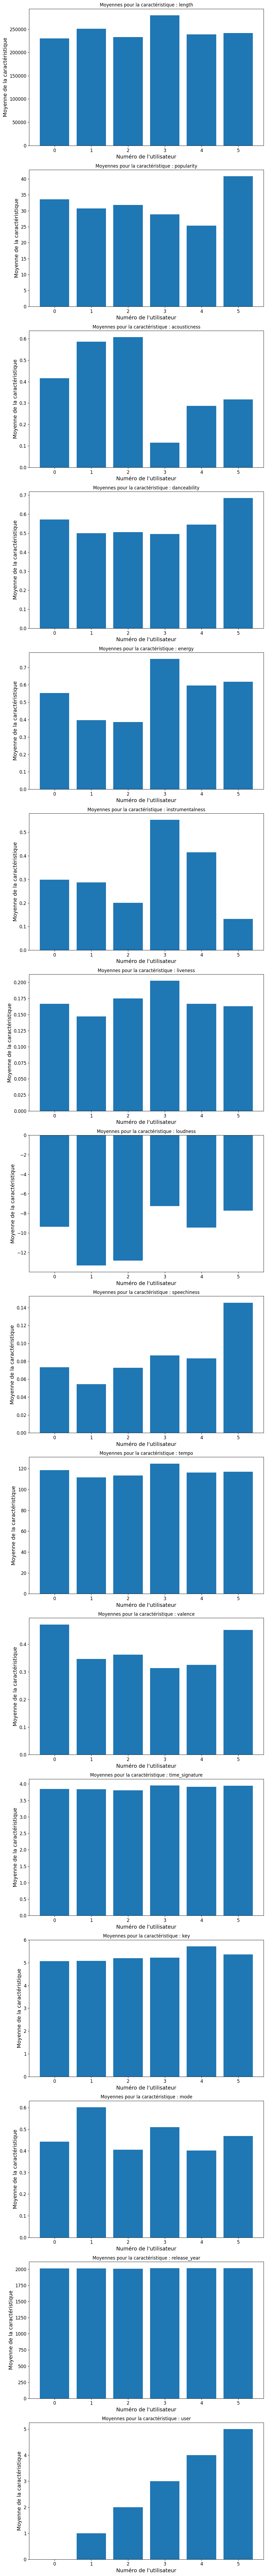

In [167]:
# Nombre de lignes dans le DataFrame
n_rows = len(moyennes_dataframe)

# Création d'une grille de subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=1, figsize=(10, 6 * n_rows))

# Assurez-vous que 'axes' est un array, même pour un seul graphique
if n_rows == 1:
    axes = [axes]

# Itération sur chaque ligne (caractéristique) dans le DataFrame
for ax, (index, row) in zip(axes, moyennes_dataframe.iterrows()):
    # Création d'un graphique en barres pour la caractéristique actuelle dans le subplot correspondant
    ax.bar(row.index, row.values)

    # Ajout de titres et d'étiquettes
    ax.set_title(f'Moyennes pour la caractéristique : {index}')
    ax.set_xlabel('Numéro de l\'utilisateur')
    ax.set_ylabel('Moyenne de la caractéristique')

# Ajustement automatique du layout
plt.tight_layout()

# Affichage de tous les graphiques
plt.show()


## Analyse des Utilisateurs

### Utilisateur 2 (delta)
- **Longueur des morceaux** : En moyenne, écoute des morceaux assez longs.
- **Popularité** : Préfère des morceaux modérément populaires.
- **Acoustique** : Tendance à écouter des morceaux plus acoustiques.
- **Dansabilité** : Moyennement dansable.
- **Énergie** : Préfère des morceaux moins énergiques.
- **Instrumental** : Une préférence marquée pour les morceaux instrumentaux.
- **Année de sortie** : Tendance à écouter des morceaux plus anciens (autour de 2007).
- **Style probable** : Folk, acoustique, jazz, ou musique classique/instrumentale.

### Utilisateur 4 (epsilon)
- **Énergie** : Morceaux plus énergiques.
- **Dansabilité** : Morceaux assez dansables.
- **Loudness** : Musique plus forte.
- **Instrumental** : Moins de préférence pour l'instrumental.
- **Année de sortie** : Préfère des musiques récentes (autour de 2015).
- **Style probable** : Pop, rock, ou électro.

### Utilisateur 1 (beta)
- **Acoustique** : Forte tendance vers l'acoustique.
- **Énergie** : Moins énergique.
- **Année de sortie** : Préfère des musiques un peu plus anciennes.
- **Style probable** : Musique acoustique, folk.

### Utilisateur 0 (alpha)
- **Dansabilité** : Forte préférence pour la dansabilité.
- **Énergie** : Énergique.
- **Année de sortie** : Préfère des musiques assez récentes.
- **Style probable** : Pop, danse, électronique.

### Utilisateur 5 (gamma)
- **Popularité** : Préfère des morceaux très populaires.
- **Dansabilité** : Très dansable.
- **Énergie** : Assez énergique.
- **Année de sortie** : Très récente (autour de 2015).
- **Style probable** : Pop moderne, hip-hop, R&B.

### Utilisateur 3 (dzeta)
- **Énergie** : Très énergique.
- **Instrumental** : Forte préférence pour l'instrumental.
- **Loudness** : Musique forte.
- **Année de sortie** : Très récente (autour de 2017).
- **Style probable** : Rock, métal, électronique, ou des genres expérimentaux.
 électronique, ou des genres expérimentaux.

## Personna

#### Utilisateur 2 (delta)
L'amateur de café et poésie qui fréquente les cafés jazz et les bibliothèques, préférant les mélodies mélancoliques et les classiques intemporels. Peut-être un écrivain en herbe ou un artiste, aimant se perdre dans des pensées profondes au son de la musique acoustique.

#### Utilisateur 4 (epsilon)
Le fan de festivals et de soirées, toujours à la recherche du prochain hit. Vit pour les beats entraînants et les basses puissantes, et probablement le premier sur la piste de danse. Son casque est un accessoire permanent, avec une playlist remplie de morceaux populaires et énergiques.

#### Utilisateur 1 (beta)
L'âme tranquille qui aime les longues promenades au crépuscule. Préfère les morceaux doux et mélodieux, probablement avec une forte tendance vers le folk ou l'acoustique. Un amoureux de la nature et des soirées tranquilles, loin de l'agitation de la vie urbaine.

#### Utilisateur 0 (alpha)
Le roi/la reine de la fête, toujours à l'affût de la prochaine grande soirée. Aime la musique qui fait bouger, des rythmes électroniques aux hits pop. Très probablement un abonné fidèle de toutes les playlists de hits du moment.

#### Utilisateur 5 (gamma)
Le jeune branché, toujours au courant des dernières tendances. Son smartphone est rempli des derniers morceaux à la mode, et il/elle connaît probablement toutes les paroles des chansons du top 50. Un véritable baromètre de la pop culture.

#### Utilisateur 3 (dzeta)
L'aventurier sonore, prêt à explorer les territoires inconnus de la musique. Attiré par les rythmes intenses et l'énergie brute, il/elle pourrait être un fan de rock métallique ou de musique électronique expérimentale. Ne recule jamais devant un son audacieux ou une nouvelle expérience musicale.
